# 股票研究

## 1. 环境设置

In [1]:
# -*- encoding: utf-8 -*-
import time
import pandas as pd
import numpy as np

from jaqs.data import DataApi


In [2]:
phone = ''
token = ''

api = DataApi("tcp://data.tushare.org:8910")
df, msg = api.login(phone, token)
df

'username: '

In [182]:
from jaqs.data import DataView
from jaqs.data import DataService
from jaqs.data import RemoteDataService

data_config = {
    "remote.data.address": "tcp://data.tushare.org:8910",
    "remote.data.username": phone,
    "remote.data.password": token
}

#symbols = '600519.SH,000858.SZ'
#symbols = '000651.SZ,000333.SZ'
#symbols = '601318.SH,601628.SH'
#symbols = '000729.SZ,600600.SH'
symbols = '600030.SH,600837.SH'

dataview_props = {# Start and end date of back-test
                  'start_date': 20170115, 'end_date': 20180115,
                  # Investment universe and performance benchmark
                  'symbol': symbols,
                  # Data fields that we need
                  'fields': '',
                  # freq = 1 means we use daily data. Please do not change this.
                  'freq': 1}

# RemoteDataService communicates with a remote server to fetch data
ds = RemoteDataService()
# Use username and password in data_config to login
ds.init_from_config(data_config)

# DataView utilizes RemoteDataService to get various data and store them
dv = DataView()
dv.init_from_config(dataview_props, ds)
dv.prepare_data()

dv.add_formula('change', 'Return(close_adj, 1)', is_quarterly=False)



Begin: DataApi login 18612562791@tcp://data.tushare.org:8910
    Already login as 18612562791, skip init_from_config
Initialize config success.
Query data...
Query data - query...
NOTE: price adjust method is [post adjust]
Query data - daily fields prepared.
Query instrument info...
Query adj_factor...
Data has been successfully prepared.


d:\QuantosTerminal\resources\app\python\lib\site-packages\jaqs-0.6.9.1-py3.6.egg\jaqs\data\dataview.py:1163: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  the_data = the_data.sortlevel(axis=1)


d:\QuantosTerminal\resources\app\python\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30).corr(other=<Series>)
  after removing the cwd from sys.path.


count    216.000000
mean       0.755573
std        0.130527
min        0.467262
25%        0.671375
50%        0.759363
75%        0.891299
max        0.957754
dtype: float64

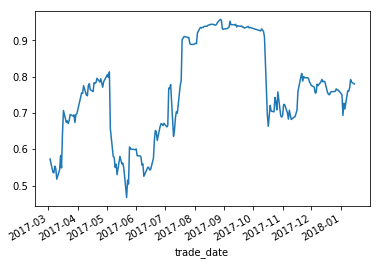

In [183]:
import jaqs.util as jutil

df = dv.get_ts('change')
corr = pd.rolling_corr(df.iloc[:,0], df.iloc[:,1], 30).dropna()

corr_plot = corr.copy()
corr_plot.index = jutil.convert_int_to_datetime(corr_plot.index)
corr_plot.plot()
corr_plot.describe()

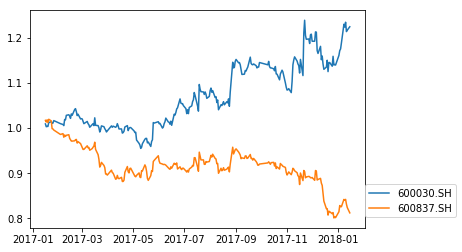

In [184]:
import matplotlib.pyplot as plt

x = jutil.convert_int_to_datetime(df.index)
y = (1+df.iloc[:,0]).cumprod()
z = (1+df.iloc[:,1]).cumprod()

plt.plot(x,y, label=df.columns[0])
plt.plot(x,z, label=df.columns[1])

plt.legend(bbox_to_anchor=(1, 0.2), loc=0, borderaxespad=0)  
plt.show()